# Prosper Loans Explanatory Analysis
## by Cristina Woodings

In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Investigation Overview

Propser Loans is a peer to peer personal loan company. They tailor small loans for anything from consolidating debt to home improvement. They have loaned out 15 billions dollars to nearly 1 million people. The peer-to-peer aspect is intriguing as one can invest as little as `$25` per loan. They tout a historical return of `5.3%` on blended average between 2011 and 2016 (with a lot of asterisks). You can explore loans by FICO score, rating and term to help you decide who to invest in. Yet it's up to you to decide who to invest in given the data Prosper offers.

## Dataset Overview

This particular data set contains over 100,000 loans with 81 pieces of information on each loan. The loans are from between 2005 and 2014 and the loan term ranges between 5 and 60 months. The loan amount ranges from `$1,000` to `$35,000`.

## Curiosities
I'm always looking of ways to invest my money and diversify savings. Peer to Peer loans seems like a neat way to help those in need while also earning some interest. Through preliminary investigation of this company and dataset, I learned a new term- "Charged off" This is a declaration by a creditor that an amount of debt is unlikely to be collected. It occurs after minimum payment has not been made for more than 6 months, and it usually goes to collection agencies at that time (1). As an investor, I interpret that as I lost all my money. These are borrowers I want to avoid. Are there indications that would predict whether a borrower would charge off? What Propser data should I use to help me decide who to invest in.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df_temp = pd.read_csv('loan_master.csv')
df = loan_df_temp.copy()

In [3]:
df.ListingCreationDate=pd.to_datetime(df.ListingCreationDate)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the status of the loans

Originally, the loans were broken up by how long they were past due. You can't really see what the overall impact is. Since I'm not a banker and I couldn't come up with a technical term that included delinquent, cancelled, defaulted and charged off loans, I just grouped them as "bad." Though "current" and "completed" could go in a "good" category, I wanted to keep them separate, since it's still to be determined if "current" will continue that way.

In [4]:
x = df.LoanStatus.value_counts()
base_color = sb.color_palette()[0]

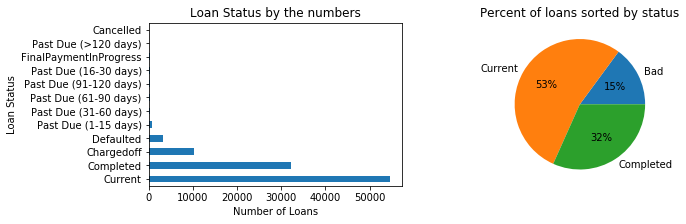

In [5]:
plt.figure(figsize = [10, 3])
plt.subplot(1, 2, 1)
x.plot(kind = 'barh', color = base_color);
plt.xlabel('Number of Loans');
plt.title("Loan Status by the numbers");
plt.ylabel("Loan Status");

plt.subplot(1, 2, 2)
sorted_counts = [["Bad", 14.9], ["Current", 53.4], ["Completed", 31.7]]
loans_sorted = pd.DataFrame(sorted_counts, columns = ['Status', 'Percentage']) 
plt.pie(loans_sorted.Percentage, labels = loans_sorted.Status, autopct='%1.0f%%');
plt.title('Percent of loans sorted by status');

## Potential Charged Off Predictors 

I wanted to graph what I thought the obvious indicators for charged off would be. Unexpectedly, the higher the loan amount, the less likely the borrow is to charge off. Expectedly, the higher the estimated return, the more likely the borrower will charge off. The lower the credit score and monthly income, the more likely to charge off.

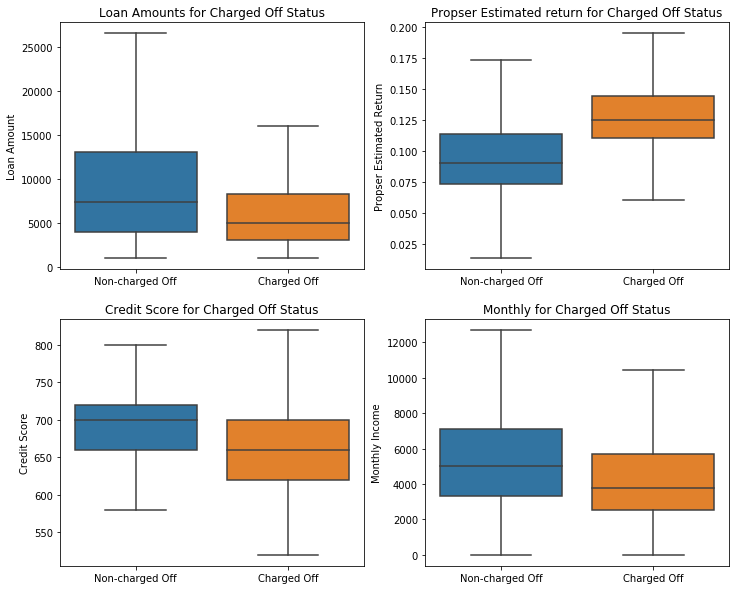

In [6]:
plt.figure(figsize = [12, 10])

plt.subplot(2, 2, 1)
sb.boxplot(data = df, x = "ChargedOff", y = "LoanOriginalAmount", showfliers=False );
x = np.arange(2);
plt.xticks(x, ('Non-charged Off', 'Charged Off'));
plt.xlabel('')
plt.ylabel('Loan Amount')
plt.title('Loan Amounts for Charged Off Status');

plt.subplot(2, 2, 2)
sb.boxplot(data = df, x = "ChargedOff", y = "EstimatedReturn", showfliers=False );
x = np.arange(2);
plt.xticks(x, ('Non-charged Off', 'Charged Off'));
plt.xlabel('')
plt.ylabel('Propser Estimated Return')
plt.title('Propser Estimated return for Charged Off Status');

plt.subplot(2, 2, 3)
sb.boxplot(data = df, x = "ChargedOff", y = "CreditScoreRangeLower", showfliers=False );
x = np.arange(2);
plt.xticks(x, ('Non-charged Off', 'Charged Off'));
plt.xlabel('')
plt.ylabel('Credit Score')
plt.title('Credit Score for Charged Off Status');

plt.subplot(2, 2, 4)
sb.boxplot(data = df, x = "ChargedOff", y = "StatedMonthlyIncome", showfliers=False );
x = np.arange(2);
plt.xticks(x, ('Non-charged Off', 'Charged Off'));
plt.xlabel('')
plt.ylabel('Monthly Income')
plt.title('Monthly for Charged Off Status');

plt.show()

## Is there a term length that has fewer Charged Off accounts?

A 36 month term has the highest chance of being charged off at 15% while 12 and 60 months are at 5%.

There are fewer and fewer charge-offs as time went on. But the whole story might be missing. The dataset concluded in March 2014. Charged off occurs when you don't make a minimum payment for more than 6 months. This is why there are zero charged off accounts for 2014. Additionally, we should still expect to see more charge off occuring after April 2009 since 5 year loans were not finalized when this dataset concluded.

In [7]:
df["Year"] = df.ListingCreationDate.dt.year

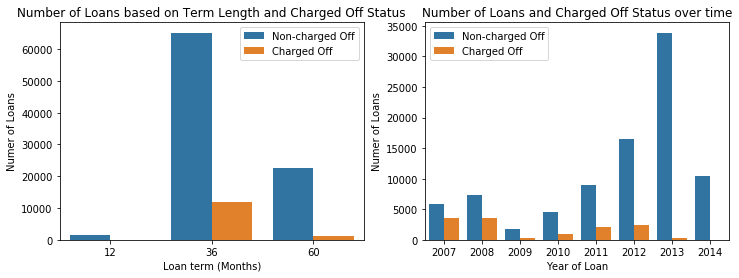

In [8]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
ax=sb.countplot(data = df, x = 'Term', hue = "ChargedOff")
plt.xlabel('Loan term (Months)');
plt.ylabel('Numer of Loans')
plt.title('Number of Loans based on Term Length and Charged Off Status');
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off');  

plt.subplot(1, 2, 2)
ax=sb.countplot(data = df, x = 'Year', hue = "ChargedOff")
plt.xlabel('Year of Loan');
plt.ylabel('Numer of Loans')
plt.title('Number of Loans and Charged Off Status over time');
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off');  


In [47]:
# Percent of charged off loans with 12 month term
df.query("Term == 12")["ChargedOff"].mean()

0.05083655083655084

In [48]:
# Percent of charged off loans with 36 month term
df.query("Term == 36")["ChargedOff"].mean()

0.15479185579042926

In [49]:
# Percent of charged off loans with 60 month term
df.query("Term == 60")["ChargedOff"].mean()

0.05118275949153969

## Credit Scores and Charge Offs over time

This chart shows that that credit score is increasingly less of an indicator whether a borrower charges off or not.

It's interesting to note that before 2010, credit score had a more significant impact on whether one charged off or not. Credit score median difference reducted from 40 to 20 between 2007 and 2010. Also note that the median credit score for charged off loans after 2010 is higher (680) than the 2007 median credit score for timely payments (660).

It is interesting to note that Prosper raised the minimum credit score to 600 in 2009. 

In [50]:
# 2007 median credit score for Non-charged off and Charged off
df.query("ChargedOff == 0 & Year == 2007")['CreditScoreRangeLower'].median(), df.query("ChargedOff == 1 & Year == 2007")['CreditScoreRangeLower'].median()

(660.0, 620.0)

In [51]:
# 2010 median credit score for Non-charged off and Charged off
df.query("ChargedOff == 0 & Year == 2010")['CreditScoreRangeLower'].median(), df.query("ChargedOff == 1 & Year == 2010")['CreditScoreRangeLower'].median()

(700.0, 680.0)

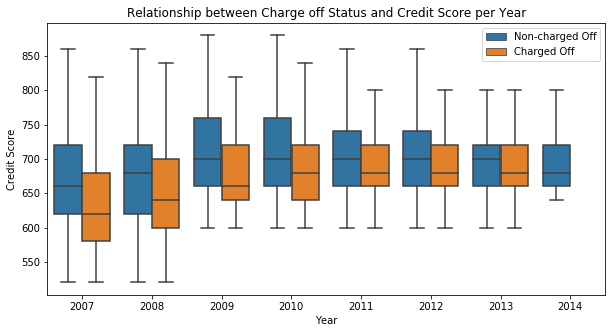

In [28]:
plt.figure(figsize=(10,5))
sb.boxplot(data=df, x='Year', y='CreditScoreRangeLower', hue='ChargedOff', showfliers=False);
plt.ylabel('Credit Score');
plt.title('Relationship between Charge off Status and Credit Score per Year');
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off');  

## How many loans are financed per each Propser Risk category?

Prosper created a proprietary ranking for a loan application's level of risk on a scale from 1 (high risk at >15% Loss Rate) to 7 (low risk 0-2% Loss Rate) (2). The rating represents an estimated average annualized loss rate range to the investor. The only characteristics Prosper divulged it takes into consideration is the borrower's credit score and any previous Prosper loans (3).

The distribution of Prosper Risk is fairly symmetric, which makes me believe they designed the rating with this as the goal. The number of charged off loans significantly decreases at medium risk, and is very minimal at low risk. One would expect that the highest risk category (level 1) would have more charge offs than level 3 risk, but they are essentially the same.

In [53]:
df['ProsperRatingNum'].mean(), df['ProsperRatingNum'].median()

(4.075183388979601, 4.0)

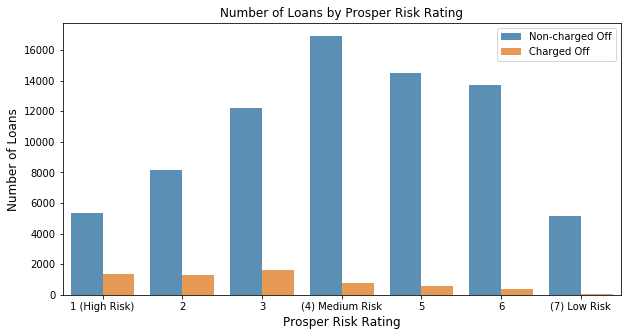

In [54]:
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = 'ProsperRatingNum', hue = 'ChargedOff', alpha=0.8);
x = np.arange(7);
plt.xticks(x, ("1 (High Risk)", "2", "3", "(4) Medium Risk","5","6", "(7) Low Risk"));
plt.title('Number of Loans by Prosper Risk Rating');
plt.ylabel('Number of Loans', fontsize=12);
plt.xlabel('Prosper Risk Rating', fontsize=12);
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off');  

## Number of loans by Year and Risk

You can see the growth in popularity of Prosper Loans. 2013 marked a year of extreme growth, which then decreased in 2014. 

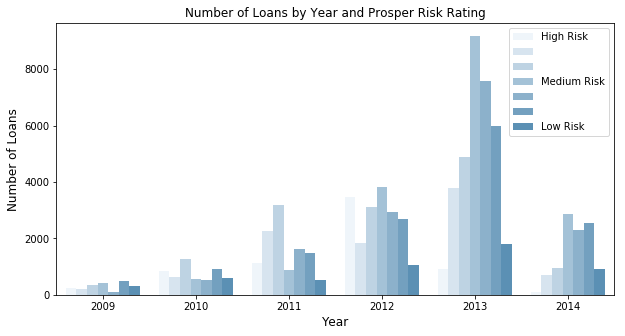

In [55]:
df_sub = df.query("Year >=2009")

plt.figure(figsize=(10,5))
sb.countplot(data = df_sub, x = "Year", hue = 'ProsperRatingNum', alpha=0.8, color = sb.color_palette()[0]);
plt.title('Number of Loans by Year and Prosper Risk Rating');
plt.ylabel('Number of Loans', fontsize=12);
plt.xlabel('Year', fontsize=12);
L = plt.legend()
L.get_texts()[0].set_text('High Risk');
L.get_texts()[1].set_text(''); 
L.get_texts()[2].set_text(''); 
L.get_texts()[3].set_text('Medium Risk'); 
L.get_texts()[4].set_text(''); 
L.get_texts()[5].set_text(''); 
L.get_texts()[6].set_text('Low Risk'); 

## Risk Rating versus Estimated Return

Higher risk rating generally means higher return (exception being the "High Risk" group). The estimated return difference between a high (level 2) and low risk (level 7) loan is substantial- around 7.3%. Keep in mind the Estimated Return is a prediction tool calculated by Prosper Loans and does not actually indicate how the loan peformed.

There is a lot of unpredictability with credit score. In some risk categories, the median credit score was actually higher for a borrower that charged off than one who did not charge off.

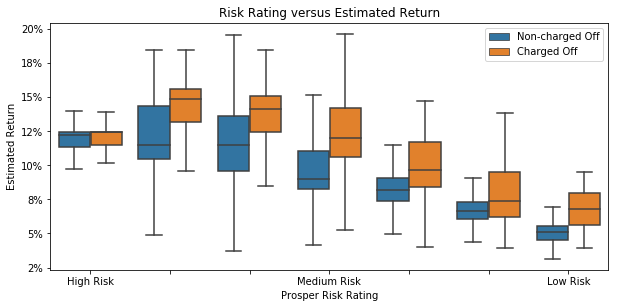

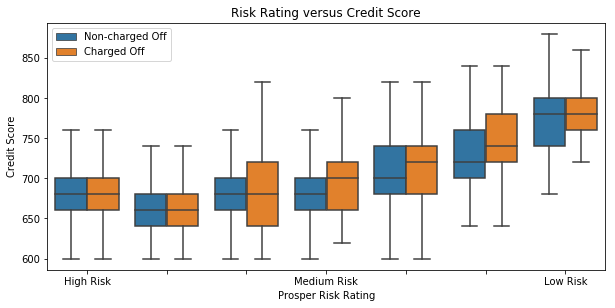

In [59]:
plt.figure(figsize = [10, 10])
plt.subplot(2, 1, 1)
ax = sb.boxplot(data=df, x='ProsperRatingNum', y='EstimatedReturn', hue='ChargedOff', showfliers=False);
x = np.arange(7);
plt.xticks(x, ("High Risk", "", "", "Medium Risk","","", "Low Risk"));
plt.ylabel('Estimated Return');
plt.xlabel('Prosper Risk Rating');
plt.title('Risk Rating versus Estimated Return');
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off'); 
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals]);


plt.figure(figsize = [10, 10])
plt.subplot(2, 1, 2)
ax = sb.boxplot(data=df, x='ProsperRatingNum', y='CreditScoreRangeLower', hue='ChargedOff', showfliers=False);
x = np.arange(7);
plt.xticks(x, ("High Risk", "", "", "Medium Risk","","", "Low Risk"));
plt.ylabel('Credit Score');
plt.xlabel('Prosper Risk Rating');
plt.title('Risk Rating versus Credit Score');
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off'); 

In [66]:
df.query("ProsperRatingNum ==7")["EstimatedReturn"].median()- df.query("ProsperRatingNum ==2")["EstimatedReturn"].median()

-0.0731

In [62]:
df.query("ProsperRatingNum ==6 & ChargedOff ==1")["CreditScoreRangeLower"].median()

740.0

In [61]:
df.query("ProsperRatingNum ==6 & ChargedOff ==0")["CreditScoreRangeLower"].median()

720.0

## Conclusion

Just based on these preliminary findings, as a more conservative investor wanting to avoid charge-offs, I would look for borrowers who:
* Have a Prosper risk rating 4 or higher.
* Within the risk rating category of choice, take a loan with a lower estimated return.
* Have term lengths of 12 months or 60 months, but not 36 months.

## Limitations

The biggest issue with this data set and findings is that it doesn't actually tell us anything about the actual return for each loan.

After finishing my analysis, I found a few articles criticizing Propser's "Estimated Returns" value. They reacted to the feedback because in May 2017, they revised their estimate to be more in line with the realized return rate (4). Under further scrutiny, after August 2018, the estimated returns, estimated losses, and effective yield information were no longer presented on the Prosper website. Rather, loan listings show a historical return range based on the loan’s Prosper rating (5).

Because calculating returns is complex and there is no consensus on what method is best, it's important to run multiple analysis on the data and not just rely solely on the stated predicted returns provided by Prosper.

### References:
1. https://en.wikipedia.org/wiki/Charge-off
2. https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline
3. https://www.prosper.com/help/topics/general-estimated_loss_rates.aspx
4. https://www.lendacademy.com/prosper-corrects-annualized-return-calculation/
5. https://blog.prosper.com/2018/07/24/historical-return-data-update/